In [1]:
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression, RidgeClassifierCV
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import (RandomForestClassifier, GradientBoostingClassifier)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score


In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
combine = [train_df, test_df]

In [3]:
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [4]:
train_df.head(7)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S


In [5]:
train_df.tail(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


In [6]:
train_df.info()
print('_'*40)
test_df.info()
# show information ในเเต่ละcolumnsว่ามีnullรึป่าว

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null

In [7]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Mellinger, Miss. Madeleine Violet",male,1601,B96 B98,S
freq,1,577,7,4,644


In [9]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [10]:
train_df[['Sex', 'Survived']].groupby(['Sex']).mean()
# โอกาศรอดเท่าไหร่

,Survived
Sex,
female,0.742038
male,0.188908


In [11]:
train_df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


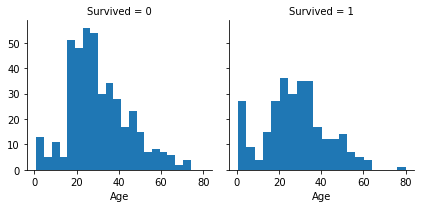

In [12]:
g = sns.FacetGrid(train_df, col='Survived')
# คนรอดหรือไม่เเยกเป็น0กับ1โดยเเบ่งเป็น20เเท่งตามอายุ
g.map(plt.hist, 'Age', bins=20)

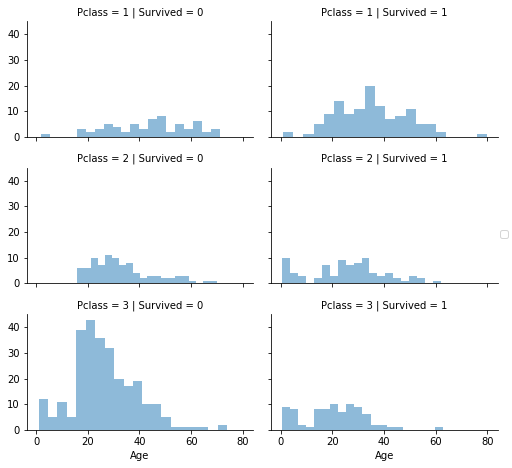

In [13]:
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=0.5, bins=20)
grid.add_legend();

C:\Users\user.DESKTOP-HGCB2QF\Anaconda3\lib\site-packages\seaborn\axisgrid.py:703: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\user.DESKTOP-HGCB2QF\Anaconda3\lib\site-packages\seaborn\axisgrid.py:708: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


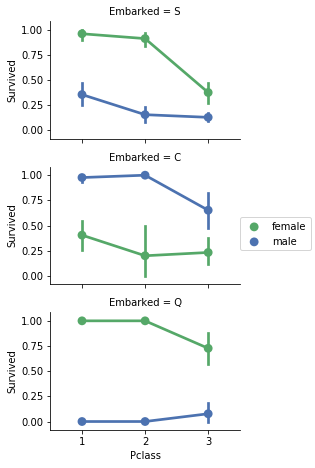

In [14]:
grid = sns.FacetGrid(train_df, row='Embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

C:\Users\user.DESKTOP-HGCB2QF\Anaconda3\lib\site-packages\seaborn\axisgrid.py:703: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


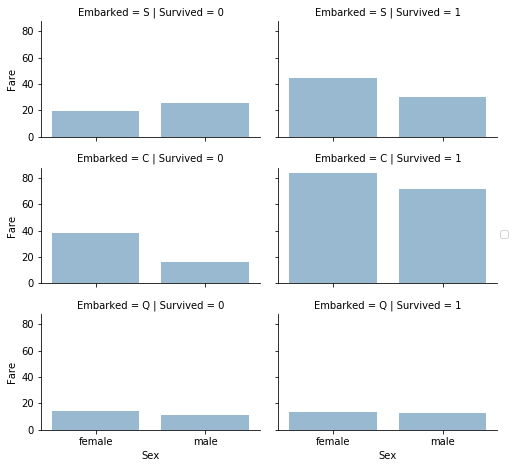

In [15]:
grid = sns.FacetGrid(train_df, row='Embarked', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend();

In [16]:
print("Before", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)

train_df = train_df.drop(['Ticket', 'Cabin'], axis=1)
test_df = test_df.drop(['Ticket', 'Cabin'], axis=1)
combine = [train_df, test_df]

"After", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape

Before (891, 12) (418, 11) (891, 12) (418, 11)


('After', (891, 10), (418, 9), (891, 10), (418, 9))

In [17]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [18]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Jonkheer', 'Dona'], 'Lady')
    dataset['Title'] = dataset['Title'].replace(['Capt', 'Don', 'Major', 'Sir'], 'Sir')
    
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Col,0.500000
1,Dr,0.428571
2,Lady,0.666667
3,Master,0.575000
4,Miss,0.702703
5,Mr,0.156673
6,Mrs,0.793651
7,Rev,0.000000
8,Sir,0.400000


In [19]:
title_mapping = {"Col": 1, "Dr": 2, "Lady": 3, "Master": 4, "Miss": 5, "Mr": 6, "Mrs": 7, "Rev": 8, "Sir": 9}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,6
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,7
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,5
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,7
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,6


In [20]:
train_df = train_df.drop(['Name', 'PassengerId'], axis=1)
test_df = test_df.drop(['Name'], axis=1)
combine = [train_df, test_df]
train_df.shape, test_df.shape

((891, 9), (418, 9))

In [21]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,6
1,1,1,1,38.0,1,0,71.2833,C,7
2,1,3,1,26.0,0,0,7.9250,S,5
3,1,1,1,35.0,1,0,53.1000,S,7
4,0,3,0,35.0,0,0,8.0500,S,6


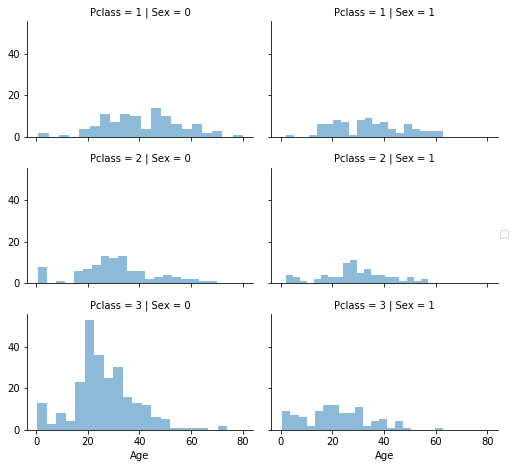

In [22]:
grid = sns.FacetGrid(train_df, row='Pclass', col='Sex', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

In [23]:
guess_ages = np.zeros((2,3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

In [24]:
for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & \
                                  (dataset['Pclass'] == j+1)]['Age'].dropna()

            age_guess = guess_df.median()

            # Convert random age float to nearest .5 age
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
    for i in range(0, 2):
         for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),\
                    'Age'] = guess_ages[i,j]

    dataset['Age'] = dataset['Age'].astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22,1,0,7.2500,S,6
1,1,1,1,38,1,0,71.2833,C,7
2,1,3,1,26,0,0,7.9250,S,5
3,1,1,1,35,1,0,53.1000,S,7
4,0,3,0,35,0,0,8.0500,S,6


In [25]:
train_df['AgeBand'] = pd.cut(train_df['Age'], 5)
train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


In [26]:
for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,0,1,1,0,7.2500,S,6,"(16.0, 32.0]"
1,1,1,1,2,1,0,71.2833,C,7,"(32.0, 48.0]"
2,1,3,1,1,0,0,7.9250,S,5,"(16.0, 32.0]"
3,1,1,1,2,1,0,53.1000,S,7,"(32.0, 48.0]"
4,0,3,0,2,0,0,8.0500,S,6,"(32.0, 48.0]"


In [27]:
train_df = train_df.drop(['AgeBand'], axis=1)
combine = [train_df, test_df]
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1,1,0,7.2500,S,6
1,1,1,1,2,1,0,71.2833,C,7
2,1,3,1,1,0,0,7.9250,S,5
3,1,1,1,2,1,0,53.1000,S,7
4,0,3,0,2,0,0,8.0500,S,6


In [28]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [29]:
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

train_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [30]:
train_df = train_df.drop(['Parch',], axis=1)
test_df = test_df.drop(['Parch'], axis=1)
combine = [train_df, test_df]

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Fare,Embarked,Title,FamilySize,IsAlone
0,0,3,0,1,1,7.2500,S,6,2,0
1,1,1,1,2,1,71.2833,C,7,2,0
2,1,3,1,1,0,7.9250,S,5,1,1
3,1,1,1,2,1,53.1000,S,7,2,0
4,0,3,0,2,0,8.0500,S,6,1,1


In [31]:
for dataset in combine:
    dataset['Age*Class'] = dataset.Age * dataset.Pclass

train_df.loc[:, ['Age*Class', 'Age', 'Pclass']].head(10)

,Age*Class,Age,Pclass
0,3,1,3
1,2,2,1
2,3,1,3
3,2,2,1
4,6,2,3
5,3,1,3
6,3,3,1
7,0,0,3
8,3,1,3
9,0,0,2


In [32]:
freq_port = train_df.Embarked.dropna().mode()[0]
freq_port

'S'

In [33]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
    
train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [34]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

train_df.head(5)

,Survived,Pclass,Sex,Age,SibSp,Fare,Embarked,Title,FamilySize,IsAlone,Age*Class
0,0,3,0,1,1,7.2500,0,6,2,0,3
1,1,1,1,2,1,71.2833,1,7,2,0,2
2,1,3,1,1,0,7.9250,0,5,1,1,3
3,1,1,1,2,1,53.1000,0,7,2,0,2
4,0,3,0,2,0,8.0500,0,6,1,1,6


In [35]:
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)
test_df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Fare,Embarked,Title,FamilySize,IsAlone,Age*Class
0,892,3,0,2,0,7.8292,2,6,1,1,6
1,893,3,1,2,1,7.0000,0,7,2,0,6
2,894,2,0,3,0,9.6875,2,6,1,1,6
3,895,3,0,1,0,8.6625,0,6,1,1,3
4,896,3,1,1,1,12.2875,0,7,3,0,3


In [36]:
train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)
train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [37]:
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train_df = train_df.drop(['FareBand'], axis=1)
combine = [train_df, test_df]
    
train_df.head(3)

,Survived,Pclass,Sex,Age,SibSp,Fare,Embarked,Title,FamilySize,IsAlone,Age*Class
0,0,3,0,1,1,0,0,6,2,0,3
1,1,1,1,2,1,3,1,7,2,0,2
2,1,3,1,1,0,1,0,5,1,1,3


In [38]:
# Test dataset
test_df.head(3)

,PassengerId,Pclass,Sex,Age,SibSp,Fare,Embarked,Title,FamilySize,IsAlone,Age*Class
0,892,3,0,2,0,0,2,6,1,1,6
1,893,3,1,2,1,0,0,7,2,0,6
2,894,2,0,3,0,1,2,6,1,1,6


In [39]:
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_test  = test_df.drop("PassengerId", axis=1).copy()

X_train.head(3)

,Pclass,Sex,Age,SibSp,Fare,Embarked,Title,FamilySize,IsAlone,Age*Class
0,3,0,1,1,0,0,6,2,0,3
1,1,1,2,1,3,1,7,2,0,2
2,3,1,1,0,1,0,5,1,1,3


In [40]:
Y_train.head(3)

0    0
1    1
2    1
Name: Survived, dtype: int64

In [41]:
X_test.head(3)

,Pclass,Sex,Age,SibSp,Fare,Embarked,Title,FamilySize,IsAlone,Age*Class
0,3,0,2,0,0,2,6,1,1,6
1,3,1,2,1,0,0,7,2,0,6
2,2,0,3,0,1,2,6,1,1,6


# Logistic Regression

In [42]:
logreg = LogisticRegression()
# เอามาเข้าโมเดล
logreg.fit(X_train, Y_train)
# เอามาทำนาย
Y_pred = logreg.predict(X_test)
# 
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

C:\Users\user.DESKTOP-HGCB2QF\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


79.57

In [43]:
logreg.coef_

array([[-0.2790199 ,  2.53050142,  0.38206091, -0.43633474,  0.26010437,
         0.17444066, -0.15116229, -0.20175837, -0.63518543, -0.40288474]])

In [44]:
train_df.head(3)

,Survived,Pclass,Sex,Age,SibSp,Fare,Embarked,Title,FamilySize,IsAlone,Age*Class
0,0,3,0,1,1,0,0,6,2,0,3
1,1,1,1,2,1,3,1,7,2,0,2
2,1,3,1,1,0,1,0,5,1,1,3


In [45]:
coeff_df = pd.DataFrame(train_df.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)
# เรียงลำดับความสำคัญว่าอะไรมีส่วนทำให้รอดชีวิตมากกว่า

,Feature,Correlation
1,Sex,2.530501
2,Age,0.382061
4,Fare,0.260104
5,Embarked,0.174441
6,Title,-0.151162
7,FamilySize,-0.201758
0,Pclass,-0.279020
9,Age*Class,-0.402885
3,SibSp,-0.436335
8,IsAlone,-0.635185


#  Support Vector Machines

In [46]:
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)

acc_svc
# print(Y_pred)

C:\Users\user.DESKTOP-HGCB2QF\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


84.06

# knn

In [47]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
# -------------------------------------------------
# บรรทัดที่4 ของอันที่1 ที่จริงเปลี่ยนX_test เป็นX_trainดีกว่า
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
# --------------------------------------------------
acc_knn
# print(Y_pred)

84.51

In [48]:
y_pred_train = knn.predict(X_train)
# ----------------------------------------------
# ทั้งหมดของบรรทัดที่4
cnt = 0
for pred, act in zip(y_pred_train, Y_train):
    if pred == act:
        cnt+=1
cnt / len(y_pred_train) * 100
# ----------------------------------------------


84.51178451178451

# Gaussian Naive Bayes

In [49]:
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

72.28

# Perceptron

In [50]:
perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

C:\Users\user.DESKTOP-HGCB2QF\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


80.47

# Decision Tree

In [51]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

89.23

# Random Forest

In [52]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

89.23

# Gradient Boosting

In [53]:
grad_boost = GradientBoostingClassifier(n_estimators = 100)
grad_boost.fit(X_train, Y_train)
Y_pred = grad_boost.predict(X_test)
grad_boost.score(X_train, Y_train)
acc_grad_boost = round(grad_boost.score(X_train, Y_train) * 100, 2)
acc_grad_boost

85.86

# RidgeClassifierCV

In [54]:
Ridge= RidgeClassifierCV()
Ridge.fit(X_train, Y_train)
Y_pred = Ridge.predict(X_test)
acc_Ridge= round(Ridge.score(X_train, Y_train) * 100, 2)
acc_Ridge

79.91

In [55]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 'Random Forest', 'Naive Bayes', 'Perceptron', 'Grad boost','Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, acc_random_forest, acc_gaussian, acc_perceptron, acc_grad_boost, acc_decision_tree]})

models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,89.23
7,Decision Tree,89.23
6,Grad boost,85.86
1,KNN,84.51
0,Support Vector Machines,84.06
5,Perceptron,80.47
2,Logistic Regression,79.57
4,Naive Bayes,72.28


In [56]:
# Split the training set into a development and an evaluation sets
from sklearn.model_selection import train_test_split
X_dev, X_eval, y_dev, y_eval = train_test_split(X_train,
                                                Y_train,
                                                test_size=0.2,
                                                random_state=42)

X_test.head(3)

,Pclass,Sex,Age,SibSp,Fare,Embarked,Title,FamilySize,IsAlone,Age*Class
0,3,0,2,0,0,2,6,1,1,6
1,3,1,2,1,0,0,7,2,0,6
2,2,0,3,0,1,2,6,1,1,6


In [63]:
# 
#  1. Random Forest คือใช้decsion tree ในการเเตกเเขนงไปด้วยๆ
import time
dict_clf = {}


paramgrid = {
    'n_estimators':      [100, 150, 200, 250, 300, 400, 500],
    'criterion':         ['gini', 'entropy'],
    'max_features':      ['auto', 'log2'],
    'min_samples_leaf':  list(range(2, 8))
}
GS = GridSearchCV(RandomForestClassifier(random_state=77),
                  paramgrid,
                  cv=4)

# Fit the data and record time taking to train
t0 = time.time()
GS.fit(X_dev, y_dev)
t = time.time() - t0

# Store best parameters, score and estimator
best_clf = GS.best_estimator_
best_params = GS.best_params_
best_score = GS.best_score_

name = 'RF'

In [64]:
best_clf.fit(X_dev, y_dev)
acc_eval = accuracy_score(y_eval, best_clf.predict(X_eval))

dict_clf[name] = {
    'best_par': best_params,
    'best_clf': best_clf,
    'best_score': best_score,
    'score_eval': acc_eval,
    'fit_time': t,
}

acc_eval

0.8156424581005587

In [65]:
# 2. GradientBoosting คือการซ่อมรอยรั่วที่ผิดพลาดของdecision tree
paramgrid = {
    'n_estimators':      [100, 150, 200, 250, 300, 400, 500],
    'max_features':      ['auto', 'log2'],
    'min_samples_leaf':  list(range(2, 7)),
    'loss' :             ['deviance', 'exponential'],
    'learning_rate':     [0.025, 0.05, 0.075, 0.1],
}
GS = GridSearchCV(GradientBoostingClassifier(random_state=77),
                  paramgrid,
                  cv=4)
# Fit the data and record time taking to train
t0 = time.time()
GS.fit(X_dev, y_dev)
t = time.time() - t0

# Store best parameters, score and estimator
best_clf = GS.best_estimator_
best_params = GS.best_params_
best_score = GS.best_score_

name = 'GB'
best_clf.fit(X_dev, y_dev)
acc_eval = accuracy_score(y_eval, best_clf.predict(X_eval))

dict_clf[name] = {
    'best_par': best_params,
    'best_clf': best_clf,
    'best_score': best_score,
    'score_eval': acc_eval,
    'fit_time': t,
}

In [66]:
acc_eval

0.8156424581005587

In [67]:
for clf in dict_clf.keys():
    print("{0} classifier:\n\t- Best score = {1:.2%}".format(clf, dict_clf[clf]['best_score']))
    print("\t- Score on evaluation set = {0:.2%}".format(dict_clf[clf]['score_eval']))
    print("\t- Fitting time = {0:.1f} min".format(round(dict_clf[clf]['fit_time']/60, 1)))
    print("\t- Best parameters:")
    for par in sorted(dict_clf[clf]['best_par'].keys()):
        print("\t\t* {0}: {1}".format(par, dict_clf[clf]['best_par'][par]))

RF classifier:
	- Best score = 84.41%
	- Score on evaluation set = 81.56%
	- Fitting time = 4.8 min
	- Best parameters:
		* criterion: entropy
		* max_features: auto
		* min_samples_leaf: 6
		* n_estimators: 500
GB classifier:
	- Best score = 83.99%
	- Score on evaluation set = 81.56%
	- Fitting time = 9.9 min
	- Best parameters:
		* learning_rate: 0.05
		* loss: exponential
		* max_features: log2
		* min_samples_leaf: 4
		* n_estimators: 100


In [68]:
from sklearn.ensemble import VotingClassifier

estimators = [('RF', dict_clf['RF']['best_clf']),
              ('GB', dict_clf['GB']['best_clf']),
              ('KNN', knn), ('svc', svc), ('trees', decision_tree)]

# Instantiate the VotingClassifier using hard voting
voter = VotingClassifier(estimators=estimators, voting='hard')
voter.fit(X_train, Y_train)

Y_pred = voter.predict(X_test).astype(int)

C:\Users\user.DESKTOP-HGCB2QF\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [69]:
submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": Y_pred
    })
submission.to_csv('submission.csv', index=False)

In [71]:
# GridSearchCV = หาพารามิตเตอร์ที่ดีที่สุด
# cv = 4 คือเราจะเอา3ตัว มาเทรน อีก1ตัววัดผล
# https://www.google.com/search?q=cross+validation+%E0%B8%84%E0%B8%B7%E0%B8%AD&rlz=1C1GCEA_enTH812TH812&source=lnms&tbm=isch&sa=X&ved=0ahUKEwjJzYCGurHiAhUJE4gKHXSMD2IQ_AUIDigB&biw=1366&bih=657#imgrc=XAd4X7FTwJNUmM: